# XGBoost

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay

%load_ext nb_black
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv(
    "/Users/drkazimieras/Turing College/Home credit default risk/main_df_ML.csv"
)

X = df.drop("TARGET", axis=1)
y = df["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numerical_cols = X.select_dtypes(include=["number"]).columns

<IPython.core.display.Javascript object>

In [3]:
numerical_transformer = Pipeline(steps=[("scaler", StandardScaler())])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)

<IPython.core.display.Javascript object>

In [4]:
XGB_model = XGBClassifier(
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1), eval_metric="logloss"
)

XGB_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", XGB_model)])

XGB_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLA...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

<IPython.core.display.Javascript object>

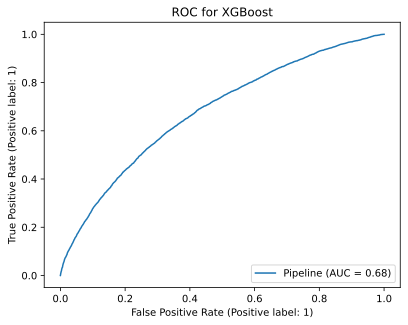

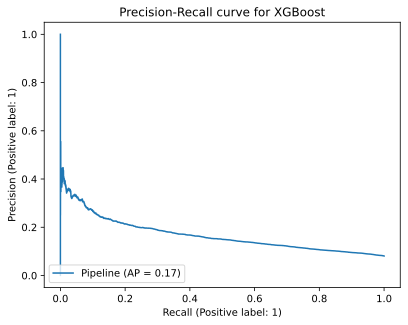

<IPython.core.display.Javascript object>

In [5]:
RocCurveDisplay.from_estimator(XGB_pipeline, X_test, y_test)
plt.title("ROC for XGBoost")
plt.show()

PrecisionRecallDisplay.from_estimator(XGB_pipeline, X_test, y_test)
plt.title("Precision-Recall curve for XGBoost")
plt.show()

## Conclusions

Metrics of interest for this model is areas under the ROC and PR curves (respectively): 0.68 and 0.17.